<span style="font-size: 24px;">"The Santiago Way" - Statistics: https://www.kaggle.com/datasets/guillermoibarra/caminodesantiagopilgrimstatisticscsv?select=camino_origin.csv
- Does the total number of pilgrims increase year-over-year, with acceleration post-2020 pandemic recovery?
- Has the proportion of pilgrims completing the full Compostela certification risen over the last decade?
- Has the percentage of female pilgrims increased significantly from 2015 to 2022?
- Is the average age of pilgrims decreasing across recent years, indicating a younger demographic shift?
- Does the French Way (Camino Francés) represent more than 60% of pilgrims in every analyzed year?
- Are secondary routes (e.g., Portuguese, Primitive) growing faster in percentage terms than the main French route?
- Do pilgrims from non-European countries (e.g., USA, Asia) show higher average journey lengths than Europeans?
- Do summer months (July-August) account for over 40% of annual pilgrims on primary routes?
- Are foot pilgrims more than 90% of total arrivals compared to cyclists or other modes?
- Is there a positive correlation between monthly temperatures and pilgrim numbers on the most popular routes?</span>

WHAT IS CAMINO?
WHO DOES IT? countries, ages, gender.
HOW MANY?
WHAT TIME OF YEAR?
atleast 5 SQL queries

In [1]:
import os
import pandas as pd

data_path = r"C:\Users\quint\Desktop\IronHack\WEEKS\FINALPROJ\data"
os.listdir(data_path)

['camino.sql',
 'camino_ages.csv',
 'camino_autonomous_comm.csv',
 'camino_continents.csv',
 'camino_countries.csv',
 'camino_gender.csv',
 'camino_groups.csv',
 'camino_motives.csv',
 'camino_origin.csv',
 'camino_routes.csv',
 'camino_totals.csv',
 'camino_totals_true.csv',
 'camino_transportation.csv',
 'df_ages.csv',
 'df_camino.csv',
 'df_conti.csv',
 'df_countries.csv',
 'df_gender.csv',
 'df_groups.csv',
 'df_motives.csv',
 'df_pilgrins.csv',
 'df_routes.csv',
 'df_trans.csv']

In [2]:
df_ages = pd.read_csv(os.path.join(data_path, "camino_ages.csv"))
df_continents = pd.read_csv(os.path.join(data_path, "camino_continents.csv"))
df_countries = pd.read_csv(os.path.join(data_path, "camino_countries.csv"))
df_gender = pd.read_csv(os.path.join(data_path, "camino_gender.csv"))
df_groups = pd.read_csv(os.path.join(data_path, "camino_groups.csv"))
df_motives = pd.read_csv(os.path.join(data_path, "camino_motives.csv"))
df_routes = pd.read_csv(os.path.join(data_path, "camino_routes.csv"))
df_trans = pd.read_csv(os.path.join(data_path, "camino_transportation.csv"))

#df_origin = pd.read_csv(os.path.join(data_path, "camino_origin.csv")) (I dont need origins of each way because I already have df for routes
#df_totals = pd.read_csv(os.path.join(data_path, "camino_totals.csv")) (droped because have all collumns in the other datasets
#df_totalstrue = pd.read_csv(os.path.join(data_path, "camino_totals_true.csv")) (same columns than all the others"
#df_autonomous = pd.read_csv(os.path.join(data_path, "camino_autonomous_comm.csv")) (Dont needed)

In [3]:
df_trans

,ID,Anho,Mes,Pie,Bicicleta,Caballo,Silla de ruedas,Vela,Total
0,200401,2004,1,599.0,44.0,0.0,0.0,0.0,643.0
1,200402,2004,2,1325.0,73.0,3.0,0.0,0.0,1401.0
2,200403,2004,3,2864.0,201.0,40.0,0.0,0.0,3105.0
3,200404,2004,4,14172.0,1282.0,100.0,0.0,0.0,15554.0
4,200405,2004,5,14312.0,2363.0,175.0,10.0,0.0,16860.0
...,...,...,...,...,...,...,...,...,...
219,202206,2022,6,53359.0,4417.0,83.0,25.0,128.0,58012.0
220,202207,2022,7,63952.0,3222.0,46.0,16.0,138.0,67374.0
221,202208,2022,8,81945.0,3703.0,129.0,20.0,45.0,85842.0
222,202209,2022,9,62228.0,3777.0,94.0,20.0,77.0,66196.0


In [4]:
df_trans.rename(columns={'Pie':'Foot', 'Bicicleta':'Bicycle'}, inplace=True)
df_trans['Other trans'] = df_trans[['Caballo','Silla de ruedas','Vela']].sum(axis=1)
df_trans.drop(columns=['Caballo','Silla de ruedas','Vela'], inplace=True)
df_trans.head()

,ID,Anho,Mes,Foot,Bicycle,Total,Other trans
0,200401,2004,1,599.0,44.0,643.0,0.0
1,200402,2004,2,1325.0,73.0,1401.0,3.0
2,200403,2004,3,2864.0,201.0,3105.0,40.0
3,200404,2004,4,14172.0,1282.0,15554.0,100.0
4,200405,2004,5,14312.0,2363.0,16860.0,185.0


In [5]:
df_countries = df_countries.rename(columns={'España': 'Spain','Alemania': 'Germany','Italia': 'Italy','Estados Unidos': 'United States', 'Francia': 'France'})

In [6]:
#df_totals = df_totals.rename(columns={'Identificador': 'ID','TotalRegistros': 'Total'})
#df_totals = df_totals.drop('Unnamed: 0', axis=1)
#df_totals.columns

In [7]:
df_routes.columns

Index(['ID', 'Anho', 'Mes', 'Frances-Camino de', 'Via de la Plata',
       'Primitivo-Camino', 'Portugues-Camino', 'Norte-Camino de',
       'Ingles-Camino', 'Costa Camino Portugues  ', 'Otros caminos',
       'Muxia-Finisterre', 'Invierno de Camino', 'Resto', 'Geira e Arrieiros',
       'Muros - Noia Camino', 'Miñoto Ribeiro', 'Camino del Barbanza',
       'Camino del Mar', 'Camino olvidado', 'San Salvador', 'Vía Céltica',
       'San Rosendo', 'Total'],
      dtype='object')

In [8]:
df_routes['Otros caminos'] += df_routes[['Resto','Geira e Arrieiros','Muros - Noia Camino','Miñoto Ribeiro','Camino del Barbanza','Camino del Mar','Camino olvidado','San Salvador','Vía Céltica','San Rosendo','Invierno de Camino']].sum(axis=1)
df_routes['Portugues-Camino'] += df_routes['Costa Camino Portugues  ']
df_routes.drop(columns=['Resto','Geira e Arrieiros','Muros - Noia Camino','Miñoto Ribeiro','Camino del Barbanza','Camino del Mar','Camino olvidado','San Salvador','Vía Céltica','San Rosendo','Invierno de Camino','Costa Camino Portugues  '], inplace=True)
df_routes.head()

,ID,Anho,Mes,Frances-Camino de,Via de la Plata,Primitivo-Camino,Portugues-Camino,Norte-Camino de,Ingles-Camino,Otros caminos,Muxia-Finisterre,Total
0,200401,2004,1,566.0,25.0,17.0,16.0,14.0,5.0,0.0,0.0,643.0
1,200402,2004,2,1124.0,20.0,0.0,178.0,41.0,34.0,4.0,0.0,1401.0
2,200403,2004,3,2349.0,92.0,9.0,411.0,103.0,141.0,0.0,0.0,3105.0
3,200404,2004,4,12024.0,735.0,100.0,2132.0,256.0,290.0,17.0,0.0,15554.0
4,200405,2004,5,13485.0,704.0,120.0,1661.0,545.0,326.0,18.0,1.0,16860.0


In [9]:
rename_dict = {'Frances-Camino de': 'French Way','Primitivo-Camino': 'Primitive Way','Portugues-Camino': 'Portuguese Way','Norte-Camino de': 'Northern Way','Ingles-Camino': 'English Way','Otros caminos': 'Other Ways'}
df_routes = df_routes.rename(columns=rename_dict)
df_routes.columns.tolist()

['ID',
 'Anho',
 'Mes',
 'French Way',
 'Via de la Plata',
 'Primitive Way',
 'Portuguese Way',
 'Northern Way',
 'English Way',
 'Other Ways',
 'Muxia-Finisterre',
 'Total']

In [10]:
df_routes

,ID,Anho,Mes,French Way,Via de la Plata,Primitive Way,Portuguese Way,Northern Way,English Way,Other Ways,Muxia-Finisterre,Total
0,200401,2004,1,566.0,25.0,17.0,16.0,14.0,5.0,0.0,0.0,643.0
1,200402,2004,2,1124.0,20.0,0.0,178.0,41.0,34.0,4.0,0.0,1401.0
2,200403,2004,3,2349.0,92.0,9.0,411.0,103.0,141.0,0.0,0.0,3105.0
3,200404,2004,4,12024.0,735.0,100.0,2132.0,256.0,290.0,17.0,0.0,15554.0
4,200405,2004,5,13485.0,704.0,120.0,1661.0,545.0,326.0,18.0,1.0,16860.0
...,...,...,...,...,...,...,...,...,...,...,...,...
219,202206,2022,6,31598.0,1536.0,2487.0,15756.0,2664.0,2502.0,1345.0,124.0,58012.0
220,202207,2022,7,34839.0,1613.0,3327.0,17899.0,4258.0,3905.0,1170.0,363.0,67374.0
221,202208,2022,8,40745.0,2137.0,5532.0,23730.0,4756.0,6590.0,2014.0,338.0,85842.0
222,202209,2022,9,33556.0,1069.0,3055.0,20249.0,2822.0,3572.0,1604.0,269.0,66196.0


In [11]:
df_motives

,ID,Anho,Mes,Religioso,Religioso y otros,No religioso,Total
0,200401,2004,1,488.0,124.0,31.0,643.0
1,200402,2004,2,1090.0,250.0,61.0,1401.0
2,200403,2004,3,2219.0,689.0,197.0,3105.0
3,200404,2004,4,11200.0,3112.0,1242.0,15554.0
4,200405,2004,5,12405.0,3378.0,1077.0,16860.0
...,...,...,...,...,...,...,...
219,202206,2022,6,21664.0,23288.0,13060.0,58012.0
220,202207,2022,7,26393.0,26458.0,14523.0,67374.0
221,202208,2022,8,35673.0,31177.0,18992.0,85842.0
222,202209,2022,9,21929.0,28006.0,16261.0,66196.0


In [12]:
df_motives['Religioso'] += df_motives['Religioso y otros']
df_motives.drop('Religioso y otros', axis=1, inplace=True)
df_motives.head()

,ID,Anho,Mes,Religioso,No religioso,Total
0,200401,2004,1,612.0,31.0,643.0
1,200402,2004,2,1340.0,61.0,1401.0
2,200403,2004,3,2908.0,197.0,3105.0
3,200404,2004,4,14312.0,1242.0,15554.0
4,200405,2004,5,15783.0,1077.0,16860.0


In [13]:
df_motives = df_motives.rename(columns={'Religioso': 'Religious','No religioso': 'Non-Religious'})
df_motives.head()
df_motives.columns.tolist()

['ID', 'Anho', 'Mes', 'Religious', 'Non-Religious', 'Total']

In [14]:
df_groups

,ID,Anho,Mes,Estudiantes,Obreros,Liberales,Empleados,Profesores,Jubilados,Tecnicos,...,Resto,Sacerdotes,Artistas,Directivos,Agricultores,Religiosas/os,Marinos,Deportistas,Sin establecer,Total
0,200401,2004,1,144.0,94.0,87.0,64.0,54.0,50.0,47.0,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.0
1,200402,2004,2,486.0,143.0,185.0,113.0,82.0,45.0,133.0,...,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1401.0
2,200403,2004,3,822.0,376.0,349.0,358.0,132.0,157.0,283.0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3105.0
3,200404,2004,4,4552.0,1442.0,1968.0,2097.0,1050.0,829.0,1386.0,...,344.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15554.0
4,200405,2004,5,1196.0,1047.0,2512.0,3626.0,598.0,2640.0,1940.0,...,492.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,202206,2022,6,1643.0,107.0,1265.0,2944.0,463.0,4122.0,842.0,...,44330.0,0.0,120.0,218.0,0.0,0.0,0.0,0.0,804.0,58012.0
220,202207,2022,7,1925.0,0.0,629.0,2534.0,770.0,1775.0,439.0,...,41086.0,0.0,0.0,204.0,0.0,0.0,0.0,0.0,1175.0,51079.0
221,202208,2022,8,1853.0,0.0,777.0,2862.0,646.0,1166.0,522.0,...,75059.0,0.0,0.0,161.0,0.0,0.0,0.0,0.0,2566.0,85842.0
222,202209,2022,9,411.0,114.0,988.0,2411.0,250.0,2740.0,371.0,...,56977.0,0.0,76.0,131.0,0.0,0.0,0.0,0.0,1272.0,66196.0


In [15]:
cols_to_sum = ['Resto', 'Sacerdotes', 'Artistas', 'Directivos', 'Agricultores', 'Religiosas/os', 'Marinos', 'Deportistas', 'Sin establecer']
df_groups['other_works'] = df_groups[cols_to_sum].sum(axis=1)
df_groups = df_groups.drop(columns=cols_to_sum)
df_groups.head()
print("sum other_works:", df_groups['other_works'].sum())

sum other_works: 677218.0


In [16]:
df_groups

,ID,Anho,Mes,Estudiantes,Obreros,Liberales,Empleados,Profesores,Jubilados,Tecnicos,Funcionarios,Parados,Amas de Casa,Total,other_works
0,200401,2004,1,144.0,94.0,87.0,64.0,54.0,50.0,47.0,34.0,23.0,22.0,643.0,24.0
1,200402,2004,2,486.0,143.0,185.0,113.0,82.0,45.0,133.0,91.0,29.0,45.0,1401.0,49.0
2,200403,2004,3,822.0,376.0,349.0,358.0,132.0,157.0,283.0,251.0,81.0,210.0,3105.0,86.0
3,200404,2004,4,4552.0,1442.0,1968.0,2097.0,1050.0,829.0,1386.0,813.0,240.0,833.0,15554.0,344.0
4,200405,2004,5,1196.0,1047.0,2512.0,3626.0,598.0,2640.0,1940.0,1220.0,255.0,1334.0,16860.0,492.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,202206,2022,6,1643.0,107.0,1265.0,2944.0,463.0,4122.0,842.0,751.0,153.0,250.0,58012.0,45472.0
220,202207,2022,7,1925.0,0.0,629.0,2534.0,770.0,1775.0,439.0,328.0,89.0,125.0,51079.0,42465.0
221,202208,2022,8,1853.0,0.0,777.0,2862.0,646.0,1166.0,522.0,230.0,0.0,0.0,85842.0,77786.0
222,202209,2022,9,411.0,114.0,988.0,2411.0,250.0,2740.0,371.0,214.0,96.0,145.0,66196.0,58456.0


In [17]:
df_groups = df_groups.rename(columns={'Estudiantes': 'Students','Obreros': 'Workers','Liberales': 'Freelancers','Empleados': 'Employees','Profesores': 'Teachers','Jubilados': 'Retirees','Tecnicos': 'Technicians','Funcionarios': 'Public_Servants','Parados': 'Unemployed','Amas de Casa': 'Housewives'})

In [18]:
df_groups.columns

Index(['ID', 'Anho', 'Mes', 'Students', 'Workers', 'Freelancers', 'Employees',
       'Teachers', 'Retirees', 'Technicians', 'Public_Servants', 'Unemployed',
       'Housewives', 'Total', 'other_works'],
      dtype='object')

In [19]:
df_countries.nunique()

ID                 224
Anho                19
Mes                 12
Spain              224
Germany            203
United States      184
Italy              200
Australia           68
France             195
Suiza               27
Japón               26
Reino Unido        155
Holanda             96
Resto              209
Portugal           203
Finlandia            6
Brasil             106
México              58
Canadá              93
Austria             57
Belgica             26
Venezuela           13
Argentina           53
Irlanda            115
Dinamarca           33
Polonia             74
Hungría              6
Corea               93
República Checa     46
China               11
Uruguay              4
Rusia               19
Ucrania              4
Chile                4
Colombia            37
Bélgica             34
Eslovaquia           6
Sudáfrica            4
Taiwán               5
Singapur             2
Rumania             11
Bulgaria             5
Suecia               4
Indonesia  

In [20]:
df_countries = df_countries.rename(columns={'España': 'Spain','Alemania': 'Germany','Italia': 'Italy','Estados Unidos': 'United States', 'Francia': 'France'})

In [21]:
keep_countries = ['Spain', 'Germany', 'Italy', 'United States', 'Portugal', 'France']
other_cols = [col for col in df_countries.columns 
              if col not in ['ID', 'Anho', 'Total'] + keep_countries]
df_countries['other_countries'] = df_countries[other_cols].sum(axis=1)
final_cols = ['ID', 'Anho', 'Total'] + keep_countries + ['other_countries']
df_countries = df_countries[final_cols]

In [22]:
df_countries.columns

Index(['ID', 'Anho', 'Total', 'Spain', 'Germany', 'Italy', 'United States',
       'Portugal', 'France', 'other_countries'],
      dtype='object')

In [23]:
df_continents

,ID,Anho,Mes,Europa,América del Norte,Oceanía,América del Sur,Asia,Africa,África,Resto,Sin establecer,Total
0,200401,2004,1,608.0,13.0,10.0,7.0,5.0,0.0,0.0,0.0,0.0,643.0
1,200402,2004,2,1332.0,30.0,2.0,31.0,3.0,3.0,0.0,0.0,0.0,1401.0
2,200403,2004,3,2986.0,66.0,4.0,34.0,15.0,0.0,0.0,0.0,0.0,3105.0
3,200404,2004,4,14934.0,320.0,38.0,223.0,27.0,12.0,0.0,0.0,0.0,15554.0
4,200405,2004,5,15629.0,593.0,108.0,487.0,24.0,19.0,0.0,0.0,0.0,16860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,202206,2022,6,47309.0,6534.0,510.0,2472.0,999.0,0.0,188.0,0.0,0.0,58012.0
220,202207,2022,7,59466.0,4805.0,277.0,1721.0,847.0,0.0,258.0,0.0,0.0,67374.0
221,202208,2022,8,80892.0,2040.0,240.0,1708.0,833.0,0.0,129.0,0.0,0.0,85842.0
222,202209,2022,9,53939.0,6866.0,642.0,3318.0,1126.0,0.0,305.0,0.0,0.0,66196.0


In [24]:
df_continents['Sin establecer'].nunique()

2

In [25]:
df_continents = df_continents.drop('Sin establecer', axis=1)

In [26]:
df_continents = df_continents.drop('Resto', axis=1)

In [27]:
df_continents['Africa'] = df_continents['Africa'].fillna(0) + df_continents['África'].fillna(0)
df_continents['America'] = df_continents['América del Sur'].fillna(0) + df_continents['América del Norte'].fillna(0)
cols_to_drop = ['África', 'América del Norte', 'América del Sur']
df_continents = df_continents.drop(columns=cols_to_drop)
df_continents.head()

,ID,Anho,Mes,Europa,Oceanía,Asia,Africa,Total,America
0,200401,2004,1,608.0,10.0,5.0,0.0,643.0,20.0
1,200402,2004,2,1332.0,2.0,3.0,3.0,1401.0,61.0
2,200403,2004,3,2986.0,4.0,15.0,0.0,3105.0,100.0
3,200404,2004,4,14934.0,38.0,27.0,12.0,15554.0,543.0
4,200405,2004,5,15629.0,108.0,24.0,19.0,16860.0,1080.0


In [28]:
df_continents.columns

Index(['ID', 'Anho', 'Mes', 'Europa', 'Oceanía', 'Asia', 'Africa', 'Total',
       'America'],
      dtype='object')

In [29]:
df_ages = df_ages.drop(columns=['Sin establecer', 'Resto'])

In [30]:
df_ages['<40'] = df_ages['<30'].fillna(0) + df_ages['30-60'].fillna(0)
df_ages['>40'] = df_ages['>60'].fillna(0)

In [31]:
cols_to_drop = ['<30', '30-60', '>60']
df_ages = df_ages.drop(columns=cols_to_drop)
df_ages.head()

,ID,Anho,Mes,Total,<40,>40
0,200401,2004,1,643.0,587.0,56.0
1,200402,2004,2,1401.0,1351.0,50.0
2,200403,2004,3,3105.0,2918.0,187.0
3,200404,2004,4,15554.0,14570.0,984.0
4,200405,2004,5,16860.0,14030.0,2830.0


In [32]:
df_gender

,ID,Anho,Mes,Hombre,Mujer,Desconocido,Sin establecer,Total
0,200401,2004,1,454.0,189.0,0.0,0.0,643.0
1,200402,2004,2,910.0,491.0,0.0,0.0,1401.0
2,200403,2004,3,1838.0,1267.0,0.0,0.0,3105.0
3,200404,2004,4,8437.0,7117.0,0.0,0.0,15554.0
4,200405,2004,5,9778.0,7082.0,0.0,0.0,16860.0
...,...,...,...,...,...,...,...,...
219,202206,2022,6,28175.0,29837.0,0.0,0.0,58012.0
220,202207,2022,7,31151.0,36223.0,0.0,0.0,67374.0
221,202208,2022,8,40301.0,45541.0,0.0,0.0,85842.0
222,202209,2022,9,30514.0,35681.0,0.0,1.0,66196.0


In [33]:
df_gender.rename(columns={'Hombre':'Men', 'Mujer':'Women'}, inplace=True)
df_gender.drop(columns=['Desconocido', 'Sin establecer'], inplace=True)
df_gender.head()

,ID,Anho,Mes,Men,Women,Total
0,200401,2004,1,454.0,189.0,643.0
1,200402,2004,2,910.0,491.0,1401.0
2,200403,2004,3,1838.0,1267.0,3105.0
3,200404,2004,4,8437.0,7117.0,15554.0
4,200405,2004,5,9778.0,7082.0,16860.0


In [34]:
df_routes.rename(columns={'Anho':'Year', 'Mes':'Month'}, inplace=True)
df_countries.rename(columns={'Anho':'Year', 'Mes':'Month'}, inplace=True)
df_groups.rename(columns={'Anho':'Year', 'Mes':'Month'}, inplace=True)
df_ages.rename(columns={'Anho':'Year', 'Mes':'Month', '>40':'=>40'}, inplace=True)
df_continents.rename(columns={'Anho':'Year', 'Mes':'Month', 'Oceanía' : 'Oceania'}, inplace=True)
df_motives.rename(columns={'Anho':'Year', 'Mes':'Month'}, inplace=True)
df_trans.rename(columns={'Anho':'Year', 'Mes':'Month'}, inplace=True)
df_gender.rename(columns={'Anho':'Year', 'Mes':'Month'}, inplace=True)

In [35]:
df_countries = df_countries.merge(
    df_routes[['ID', 'Month']], 
    on='ID', 
    how='left'
)
df_countries.head()

,ID,Year,Total,Spain,Germany,Italy,United States,Portugal,France,other_countries,Month
0,200401,2004,643.0,546.0,14.0,12.0,13.0,0.0,9.0,50.0,1
1,200402,2004,1401.0,1146.0,32.0,7.0,13.0,58.0,21.0,126.0,2
2,200403,2004,3105.0,2703.0,114.0,20.0,30.0,22.0,23.0,196.0,3
3,200404,2004,15554.0,12745.0,458.0,154.0,171.0,489.0,408.0,1133.0,4
4,200405,2004,16860.0,11210.0,1221.0,514.0,284.0,226.0,1097.0,2313.0,5


In [36]:
df_camino = pd.concat([df_routes, df_countries, df_groups, df_ages, df_continents, df_motives, df_trans, df_gender],axis=1)

In [37]:
df_camino.shape

(226, 72)

In [38]:
df_camino.columns

Index(['ID', 'Year', 'Month', 'French Way', 'Via de la Plata', 'Primitive Way',
       'Portuguese Way', 'Northern Way', 'English Way', 'Other Ways',
       'Muxia-Finisterre', 'Total', 'ID', 'Year', 'Total', 'Spain', 'Germany',
       'Italy', 'United States', 'Portugal', 'France', 'other_countries',
       'Month', 'ID', 'Year', 'Month', 'Students', 'Workers', 'Freelancers',
       'Employees', 'Teachers', 'Retirees', 'Technicians', 'Public_Servants',
       'Unemployed', 'Housewives', 'Total', 'other_works', 'ID', 'Year',
       'Month', 'Total', '<40', '=>40', 'ID', 'Year', 'Month', 'Europa',
       'Oceania', 'Asia', 'Africa', 'Total', 'America', 'ID', 'Year', 'Month',
       'Religious', 'Non-Religious', 'Total', 'ID', 'Year', 'Month', 'Foot',
       'Bicycle', 'Total', 'Other trans', 'ID', 'Year', 'Month', 'Men',
       'Women', 'Total'],
      dtype='object')

In [39]:
df_camino = df_camino.loc[:, ~df_camino.columns.duplicated()].copy()

In [40]:
df_camino.shape

(226, 44)

In [41]:
df_motives.columns

Index(['ID', 'Year', 'Month', 'Religious', 'Non-Religious', 'Total'], dtype='object')

In [42]:
for df_name in ['df_motives', 'df_routes', 'df_countries','df_gender','df_trans','df_countries','df_ages','df_continents','df_camino']:
    df = globals()[df_name]
    numeric_cols = df.select_dtypes(include=['float']).columns
    df[numeric_cols] = df[numeric_cols].astype('Int64')

In [43]:
df_motives.dtypes

ID               int64
Year             int64
Month            int64
Religious        Int64
Non-Religious    Int64
Total            Int64
dtype: object

In [44]:
df_pilgrins = df_camino[['ID', 'Men', 'Women', '=>40', '<40']].copy()

df_pilgrins.head()

,ID,Men,Women,=>40,<40
0,200401,454,189,56,587
1,200402,910,491,50,1351
2,200403,1838,1267,187,2918
3,200404,8437,7117,984,14570
4,200405,9778,7082,2830,14030


In [45]:
df_routes['route_id'] = range(1, len(df_routes) + 1)
df_trans['route_id'] = range(1, len(df_trans) + 1)
print("df_routes route_id:", df_routes['route_id'].head())
print("df_trans route_id:", df_trans['route_id'].head())

df_routes route_id: 0    1
1    2
2    3
3    4
4    5
Name: route_id, dtype: int64
df_trans route_id: 0    1
1    2
2    3
3    4
4    5
Name: route_id, dtype: int64


In [46]:
if 'Total' in df_ages.columns: 
    df_ages.drop('Total', axis=1, inplace=True)

if 'Total' in df_continents.columns: 
    df_continents.drop('Total', axis=1, inplace=True)



if 'Total' in df_countries.columns: 
    df_countries.drop('Total', axis=1, inplace=True)



if 'Total' in df_motives.columns: 
    df_motives.drop('Total', axis=1, inplace=True)



if 'Total' in df_groups.columns: 
    df_groups.drop('Total', axis=1, inplace=True)




if 'Total' in df_pilgrins.columns: 
    df_pilgrins.drop('Total', axis=1, inplace=True)


if 'Total' in df_routes.columns: 
    df_routes.drop('Total', axis=1, inplace=True)


if 'Total' in df_trans.columns: 
    df_trans.drop('Total', axis=1, inplace=True)


In [47]:
df_continents

,ID,Year,Month,Europa,Oceania,Asia,Africa,America
0,200401,2004,1,608,10,5,0,20
1,200402,2004,2,1332,2,3,3,61
2,200403,2004,3,2986,4,15,0,100
3,200404,2004,4,14934,38,27,12,543
4,200405,2004,5,15629,108,24,19,1080
...,...,...,...,...,...,...,...,...
219,202206,2022,6,47309,510,999,188,9006
220,202207,2022,7,59466,277,847,258,6526
221,202208,2022,8,80892,240,833,129,3748
222,202209,2022,9,53939,642,1126,305,10184


df_ages = pd.read_csv("df_ages.csv")
print(f"df_ages: {len(df_ages)} → {len(df_ages.dropna())} lines")
df_ages = df_ages.dropna()
df_ages.to_csv("df_ages.csv", index=False)

df_continents = pd.read_csv("df_continents.csv")
print(f"df_continents: {len(df_continents)} → {len(df_continents.dropna())} lines")
df_continents = df_continents.dropna()
df_continents.to_csv("df_continents.csv", index=False)

df_countries = pd.read_csv("df_countries.csv")
print(f"df_countries: {len(df_countries)} → {len(df_countries.dropna())} lines")
df_countries = df_countries.dropna()
df_countries.to_csv("df_countries.csv", index=False)

df_motives = pd.read_csv("df_motives.csv")
print(f"df_motives: {len(df_motives)} → {len(df_motives.dropna())} lines")
df_motives = df_motives.dropna()
df_motives.to_csv("df_motives.csv", index=False)

df_groups = pd.read_csv("df_groups.csv")
print(f"df_groups: {len(df_groups)} → {len(df_groups.dropna())} lines")
df_groups = df_groups.dropna()
df_groups.to_csv("df_groups.csv", index=False)

df_pilgrins = pd.read_csv("df_pilgrins.csv")
print(f"df_pilgrins: {len(df_pilgrins)} → {len(df_pilgrins.dropna())} lines")
df_pilgrins = df_pilgrins.dropna()
df_pilgrins.to_csv("df_pilgrins.csv", index=False)

df_gender = pd.read_csv("df_gender.csv")
print(f"df_gender: {len(df_gender)} → {len(df_gender.dropna())} lines")
df_gender = df_gender.dropna()
df_gender.to_csv("df_gender.csv", index=False)

df_routes = pd.read_csv("df_routes.csv")
print(f"df_routes: {len(df_routes)} → {len(df_routes.dropna())} lines")
df_routes = df_routes.dropna()
df_routes.to_csv("df_routes.csv", index=False)

df_trans = pd.read_csv("df_trans.csv")
print(f"df_trans: {len(df_trans)} → {len(df_trans.dropna())} lines")
df_trans = df_trans.dropna()
df_trans.to_csv("df_trans.csv", index=False)

In [48]:
df_continents.columns

Index(['ID', 'Year', 'Month', 'Europa', 'Oceania', 'Asia', 'Africa',
       'America'],
      dtype='object')


df_ages = pd.read_csv('df_ages.csv')
df_ages.columns = df_ages.columns.astype(str).str.strip()
df_ages = df_ages.loc[:, ~df_ages.columns.str.contains('Unnamed|None', na=False)]
df_ages.to_csv('df_ages.csv', index=False)

df_continents = pd.read_csv('df_continents.csv')
df_continents.columns = df_continents.columns.astype(str).str.strip()
df_continents = df_continents.loc[:, ~df_continents.columns.str.contains('Unnamed|None', na=False)]
df_continents.to_csv('df_continents.csv', index=False)
df_countries = pd.read_csv('df_countries.csv')
df_countries.columns = df_countries.columns.astype(str).str.strip()
df_countries = df_countries.loc[:, ~df_countries.columns.str.contains('Unnamed|None', na=False)]
df_countries.to_csv('df_countries.csv', index=False)
df_motives = pd.read_csv('df_motives.csv')
df_motives.columns = df_motives.columns.astype(str).str.strip()
df_motives = df_motives.loc[:, ~df_motives.columns.str.contains('Unnamed|None', na=False)]
df_motives.to_csv('df_motives.csv', index=False)
df_groups = pd.read_csv('df_groups.csv')
df_groups.columns = df_groups.columns.astype(str).str.strip()
df_groups = df_groups.loc[:, ~df_groups.columns.str.contains('Unnamed|None', na=False)]
df_groups.to_csv('df_groups.csv', index=False)
df_pilgrins = pd.read_csv('df_pilgrins.csv')
df_pilgrins.columns = df_pilgrins.columns.astype(str).str.strip()
df_pilgrins = df_pilgrins.loc[:, ~df_pilgrins.columns.str.contains('Unnamed|None', na=False)]
df_pilgrins.to_csv('df_pilgrins.csv', index=False)
df_gender = pd.read_csv('df_gender.csv')
df_gender.columns = df_gender.columns.astype(str).str.strip()
df_gender = df_gender.loc[:, ~df_gender.columns.str.contains('Unnamed|None', na=False)]
df_gender.to_csv('df_gender.csv', index=False)
df_routes = pd.read_csv('df_routes.csv')
df_routes.columns = df_routes.columns.astype(str).str.strip()
df_routes = df_routes.loc[:, ~df_routes.columns.str.contains('Unnamed|None', na=False)]
df_routes.to_csv('df_routes.csv', index=False)
df_trans = pd.read_csv('df_trans.csv')
df_trans.columns = df_trans.columns.astype(str).str.strip()
df_trans = df_trans.loc[:, ~df_trans.columns.str.contains('Unnamed|None', na=False)]
df_trans.to_csv('df_trans.csv', index=False)

In [49]:
df_ages.value_counts()

ID      Year  Month  <40    =>40 
200401  2004  1      587    56       1
201802  2018  2      0      0        1
201512  2015  12     1899   163      1
201601  2016  1      1221   83       1
201602  2016  2      1600   133      1
                                    ..
201008  2010  8      58736  2798     1
201009  2010  9      31043  5805     1
201010  2010  10     22073  4525     1
201011  2010  11     7004   1071     1
202210  2022  10     37252  14104    1
Name: count, Length: 226, dtype: int64

In [50]:
df_ages.shape

(226, 5)

In [51]:
df_ages.isnull().sum()

ID       0
Year     0
Month    0
<40      0
=>40     0
dtype: int64

In [52]:
df_ages['<40'].value_counts()

<40
0        13
24894     2
11991     1
22553     1
27056     1
         ..
5398      1
17338     1
22556     1
27328     1
37252     1
Name: count, Length: 213, dtype: Int64

In [53]:
df_ages['<40'].unique()

<IntegerArray>
[  587,  1351,  2918, 14570, 14030, 16477, 30132, 44303, 20417, 12908,
 ...
  1484,  1797,  6285, 28796, 32875, 43092, 59061, 78706, 49524, 37252]
Length: 213, dtype: Int64

In [54]:
df_ages['<40'][df_ages['<40'] == None]

Series([], Name: <40, dtype: Int64)

In [55]:
df_ages['=>40'][df_ages['=>40'] == None]

Series([], Name: =>40, dtype: Int64)

In [56]:
df_ages['Year'][df_ages['Year'] == None]

Series([], Name: Year, dtype: int64)

In [57]:
df_ages['Month'][df_ages['Month'] == None]

Series([], Name: Month, dtype: int64)

In [58]:
df_ages['ID'][df_ages['ID'] == None]

Series([], Name: ID, dtype: int64)

In [59]:
from PIL import Image
import numpy as np
img_path = r'C:\Users\quint\.gemini\antigravity\brain\85cc8a17-1bd4-46f1-b2b5-a679c5b4f55e\pilgrim_icon.png'
img = Image.open(img_path).convert("RGBA")
# Convert to numpy array
data = np.array(img)
threshold = 240
red, green, blue, alpha = data.T
# Identify white areas (background)
white_areas = (red > threshold) & (green > threshold) & (blue > threshold)
# Set alpha to 0 for white areas
data[..., 3][white_areas.T] = 0
# Convert back to image
new_img = Image.fromarray(data)
new_img.save(img_path)
print(f"Transparency applied to: {img_path}")

Transparency applied to: C:\Users\quint\.gemini\antigravity\brain\85cc8a17-1bd4-46f1-b2b5-a679c5b4f55e\pilgrim_icon.png




    How has the total number of pilgrims evolved over time?

    Which months are high season vs low season?

    Which routes (French, Portuguese, etc.) concentrate the highest demand, and in which months?

    What is the share of pilgrims on foot vs bicycle vs other transport modes?

    Which origin countries are most important and how are they changing over time?


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")

df = pd.read_csv("df_camino.csv")

df.head()
df.dtypes


ID                  float64
Year                float64
Month               float64
French Way          float64
Via de la Plata     float64
Primitive Way       float64
Portuguese Way      float64
Northern Way        float64
English Way         float64
Other Ways          float64
Muxia-Finisterre    float64
Total               float64
Spain               float64
Germany             float64
Italy               float64
United States       float64
Portugal            float64
France              float64
other_countries     float64
Students            float64
Workers             float64
Freelancers         float64
Employees           float64
Teachers            float64
Retirees            float64
Technicians         float64
Public_Servants     float64
Unemployed          float64
Housewives          float64
other_works         float64
<40                   int64
=>40                  int64
Europa              float64
Oceania             float64
Asia                float64
Africa              

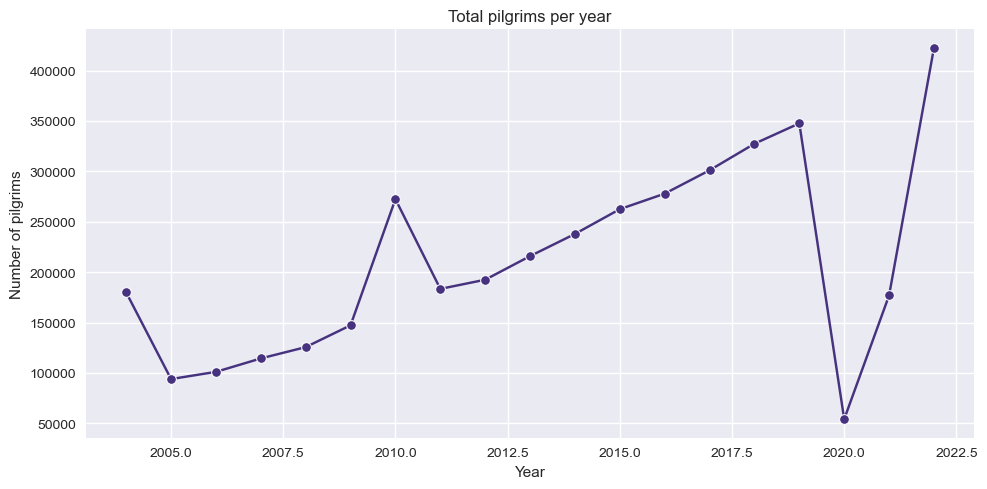

In [61]:
yearly = df.groupby("Year", as_index=False)["Total"].sum()

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x="Year", y="Total", marker="o")
plt.title("Total pilgrims per year")
plt.ylabel("Number of pilgrims")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
#Long‑term growth.

#Impact of COVID (2020–2021).

#Strong recovery in recent years.


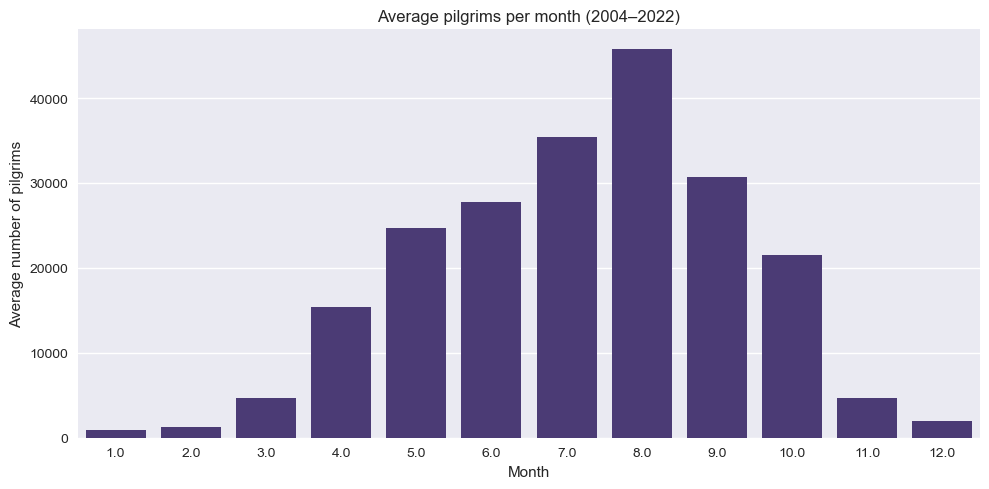

In [62]:
monthly_mean = df.groupby("Month", as_index=False)["Total"].mean()

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_mean, x="Month", y="Total")
plt.title("Average pilgrims per month (2004–2022)")
plt.ylabel("Average number of pilgrims")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [ ]:
#Peak season months (where hostels and restaurants should increase capacity, staff, and inventory).
#Off‑season months (where they can reduce costs or run promotions).


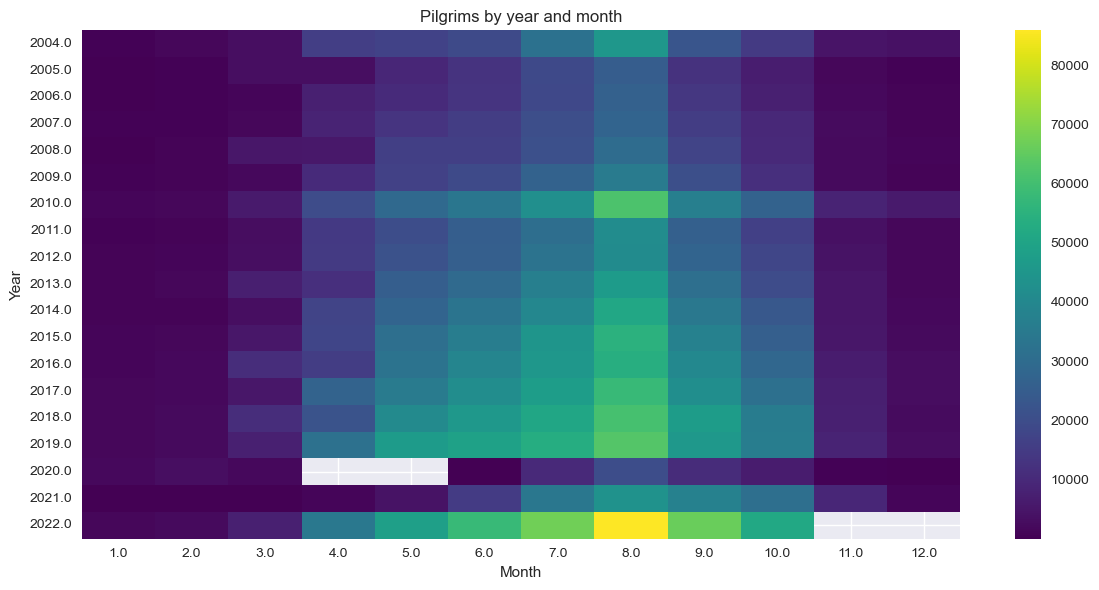

In [63]:
year_month = df.pivot_table(
    index="Year", 
    columns="Month", 
    values="Total", 
    aggfunc="sum"
)

plt.figure(figsize=(12,6))
sns.heatmap(year_month, cmap="viridis")
plt.title("Pilgrims by year and month")
plt.ylabel("Year")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [ ]:
#This visually highlights high‑pressure periods across years. As we can see, right after COVID, we almost had no pressure until next year, but then it started to increase more than as usual.

In [64]:
routes_cols = [
    "French Way",
    "Portuguese Way",
    "Northern Way",
    "English Way",
    "Other Ways"
]

<Figure size 1000x600 with 0 Axes>

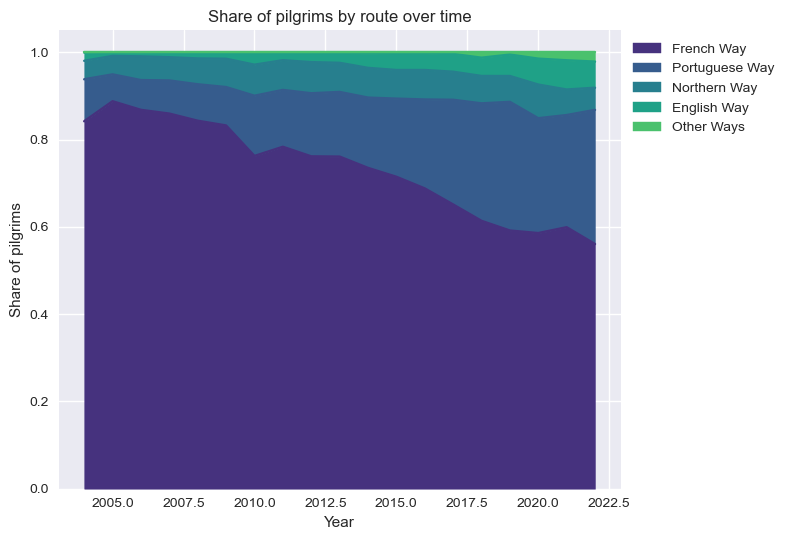

In [65]:
routes_year = df.groupby("Year")[routes_cols].sum()
routes_share = routes_year.div(routes_year.sum(axis=1), axis=0)

plt.figure(figsize=(10,6))
routes_share.plot(kind="area", stacked=True)
plt.title("Share of pilgrims by route over time")
plt.ylabel("Share of pilgrims")
plt.xlabel("Year")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [66]:
#French Way dominates most years.
#Secondary routes (Portuguese Way, Northern Way, English Way) may be gaining share.
#New investments in accommodation and F&B infrastructure might be justified on growing routes.

In [ ]:
DUVIDA, NAO DEVIA TAR O FRENCH WAY EM CIMA COM 1.0?

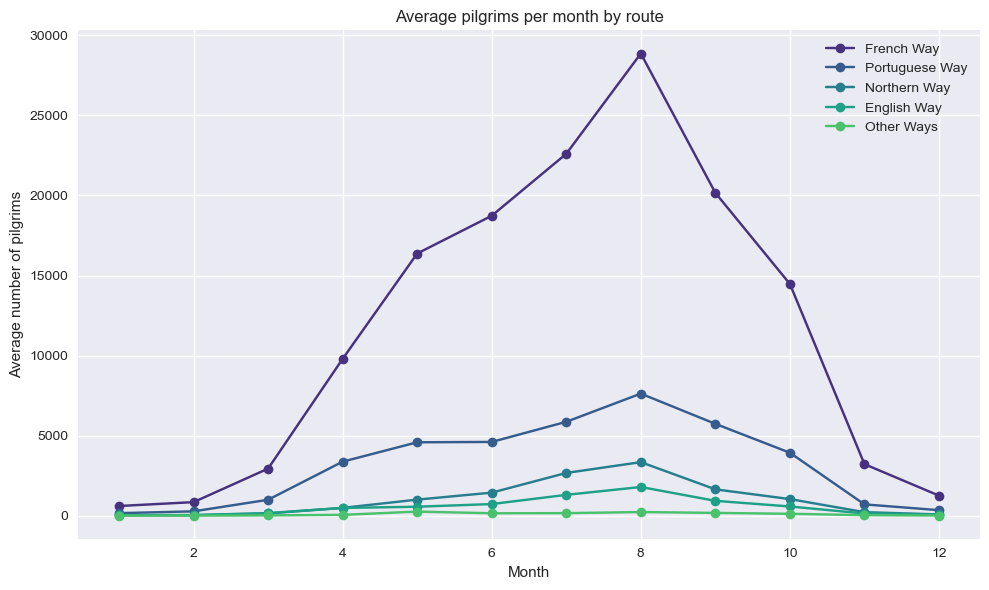

In [67]:
routes_month = df.groupby("Month")[routes_cols].mean()

plt.figure(figsize=(10,6))
for col in routes_cols:
    plt.plot(routes_month.index, routes_month[col], marker="o", label=col)

plt.title("Average pilgrims per month by route")
plt.xlabel("Month")
plt.ylabel("Average number of pilgrims")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#French and Portuguese Ways show strong peaks in august → higher overbooking risk there.
#Some routes have more balanced seasonality, where capacity planning can be flatter.

<Figure size 1000x600 with 0 Axes>

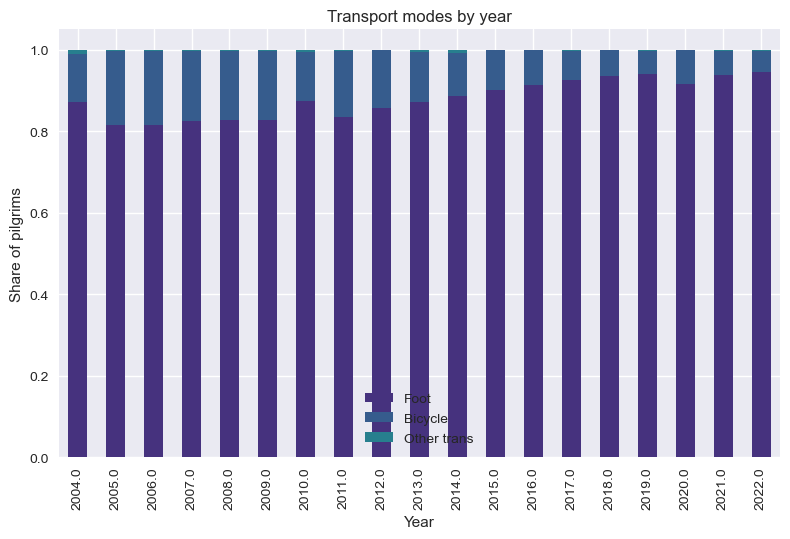

In [68]:
trans_cols = ["Foot", "Bicycle", "Other trans"]

trans_year = df.groupby("Year")[trans_cols].sum()
trans_share = trans_year.div(trans_year.sum(axis=1), axis=0)

plt.figure(figsize=(10,6))
trans_share.plot(kind="bar", stacked=True)
plt.title("Transport modes by year")
plt.ylabel("Share of pilgrims")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
#A very high share of Foot implies longer stays and heavier demand on beds and restaurants along the route.
#Increases in Bicycle may indicate a growing need for luggage transport and bike‑friendly services.

<Figure size 1000x600 with 0 Axes>

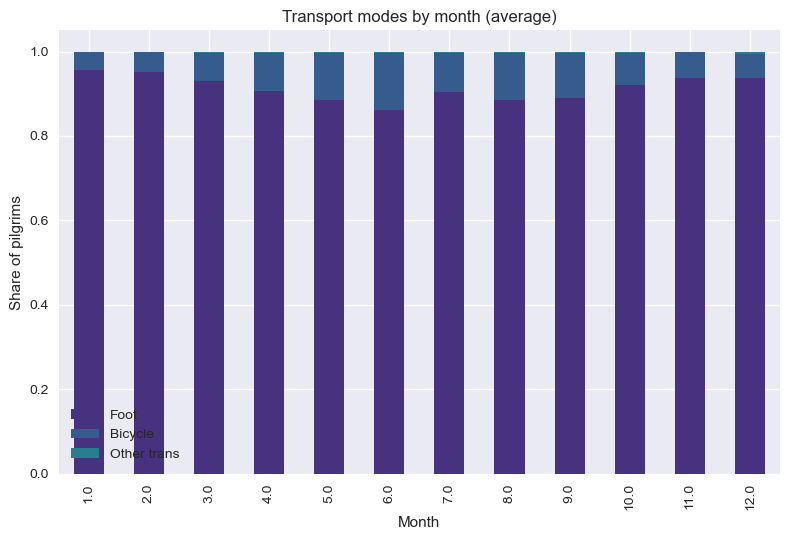

In [69]:
trans_month = df.groupby("Month")[trans_cols].sum()
trans_month_share = trans_month.div(trans_month.sum(axis=1), axis=0)

plt.figure(figsize=(10,6))
trans_month_share.plot(kind="bar", stacked=True)
plt.title("Transport modes by month (average)")
plt.ylabel("Share of pilgrims")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [ ]:
#To see if, for example, summer has relatively more bicycles (more pressure on bike rental, shuttles, etc.).

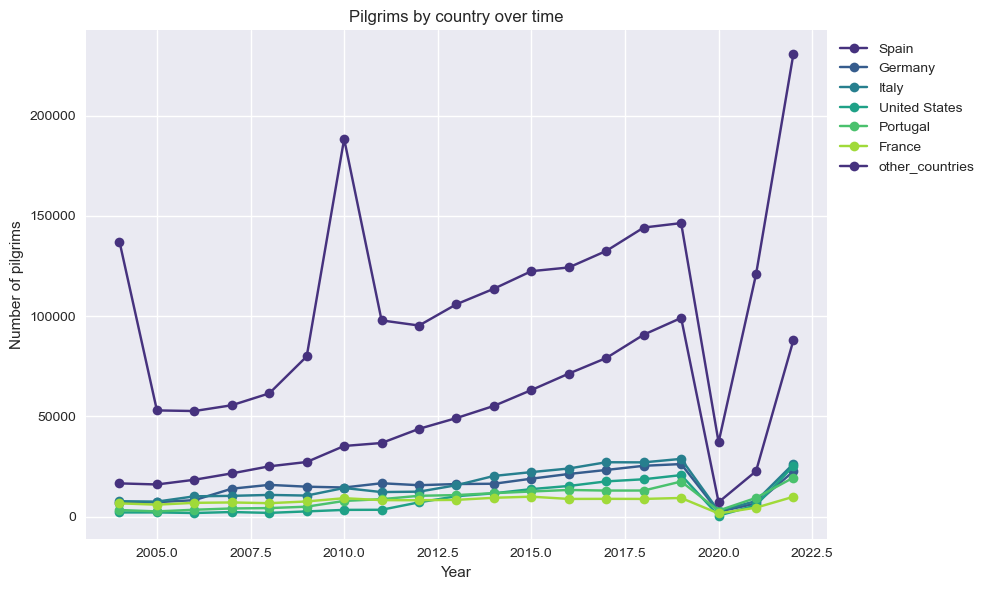

In [72]:
country_cols = [
    "Spain",
    "Germany",
    "Italy",
    "United States",
    "Portugal",
    "France",
    "other_countries"
]

countries_year = df.groupby("Year")[country_cols].sum()

plt.figure(figsize=(10,6))
for col in country_cols:
    plt.plot(countries_year.index, countries_year[col], marker="o", label=col)

plt.title("Pilgrims by country over time")
plt.xlabel("Year")
plt.ylabel("Number of pilgrims")
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [ ]:
#Spain is the main origin, but foreign markets (e.g. US, Germany, Italy, Portugal) have grown over time.
#Businesses might adapt menus, language support, and pricing strategies accordingly.

<Figure size 800x500 with 0 Axes>

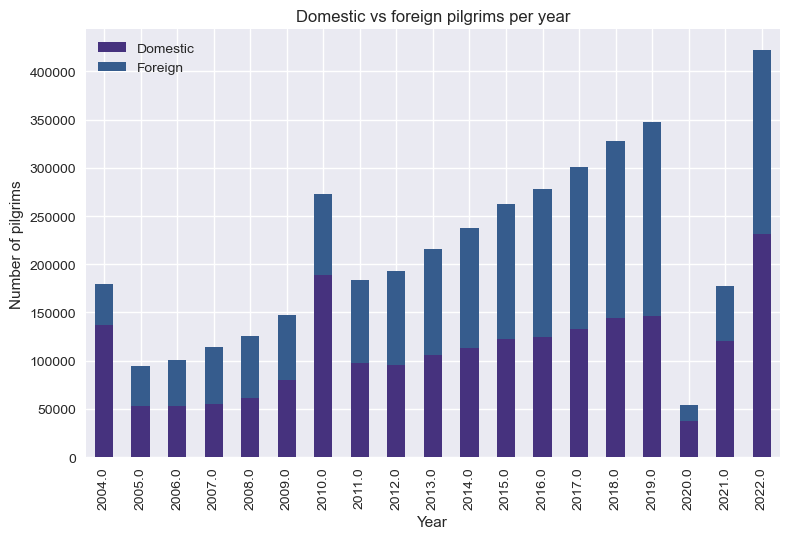

In [73]:
countries_year["Domestic"] = countries_year["Spain"]
countries_year["Foreign"] = countries_year[country_cols].sum(axis=1) - countries_year["Spain"]

plt.figure(figsize=(8,5))
countries_year[["Domestic", "Foreign"]].plot(kind="bar", stacked=True)
plt.title("Domestic vs foreign pilgrims per year")
plt.ylabel("Number of pilgrims")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [ ]:
#Growing foreign demand implies more need for multilingual staff and information materials.

Between June and September, the average number of pilgrims is X% above the yearly average. Hostels should increase bed capacity and staff during these months, especially on the French and Portuguese Ways.

The Portuguese Way’s share of pilgrims has increased from Y% to Z% in recent years, suggesting more pressure on local accommodation and F&B along that route.

More than N% of pilgrims travel on foot, which translates into longer journeys and more overnight stays, making bed capacity and food service planning critical.

The share of foreign pilgrims has grown in the last decade, particularly from countries A, B, and C. Local businesses should invest in English‑language communication and adapt menus to international tastes.